# Part 1 - EDA

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# import the datasets:
checks_url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
deaths_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/accidental_deaths.csv'
injuries_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/accidental_injuries.csv'
shootings_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings.csv'
checks_df = pd.read_csv(checks_url)
injuries_df = pd.read_csv(injuries_url)
deaths_df = pd.read_csv(deaths_url)
shootings_df = pd.read_csv(shootings_url)


In [0]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
states.append("District of Columbia") # Note that we are including District of Columbia

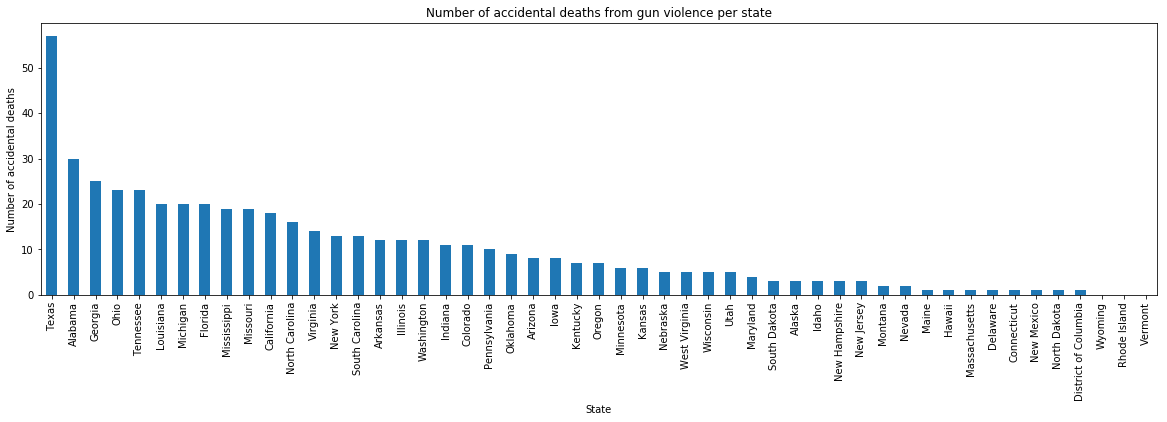

In [0]:
# Number of accidental deaths from gun violence per state
deaths_sorted = deaths_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)
deaths_sorted.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Number of accidental deaths from gun violence per state")
plt.xlabel("State")
plt.ylabel("Number of accidental deaths")
plt.show()

In [0]:
# Accidental deaths
deaths_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)

Texas                   57
Alabama                 30
Georgia                 25
Ohio                    23
Tennessee               23
Louisiana               20
Michigan                20
Florida                 20
Mississippi             19
Missouri                19
California              18
North Carolina          16
Virginia                14
New York                13
South Carolina          13
Arkansas                12
Illinois                12
Washington              12
Indiana                 11
Colorado                11
Pennsylvania            10
Oklahoma                 9
Arizona                  8
Iowa                     8
Kentucky                 7
Oregon                   7
Minnesota                6
Kansas                   6
Nebraska                 5
West Virginia            5
Wisconsin                5
Utah                     5
Maryland                 4
South Dakota             3
Alaska                   3
Idaho                    3
New Hampshire            3
N

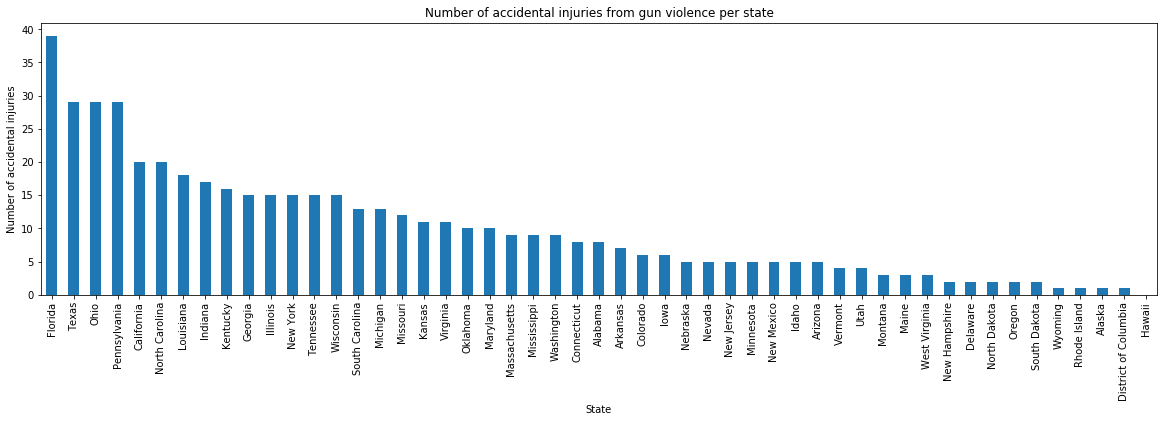

In [0]:
injuries_sorted = injuries_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)
injuries_sorted.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Number of accidental injuries from gun violence per state")
plt.xlabel("State")
plt.ylabel("Number of accidental injuries")
plt.show()

In [0]:
# Accidental injuries
injuries_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)

Florida                 39
Texas                   29
Ohio                    29
Pennsylvania            29
California              20
North Carolina          20
Louisiana               18
Indiana                 17
Kentucky                16
Georgia                 15
Illinois                15
New York                15
Tennessee               15
Wisconsin               15
South Carolina          13
Michigan                13
Missouri                12
Kansas                  11
Virginia                11
Oklahoma                10
Maryland                10
Massachusetts            9
Mississippi              9
Washington               9
Connecticut              8
Alabama                  8
Arkansas                 7
Colorado                 6
Iowa                     6
Nebraska                 5
Nevada                   5
New Jersey               5
Minnesota                5
New Mexico               5
Idaho                    5
Arizona                  5
Vermont                  4
U

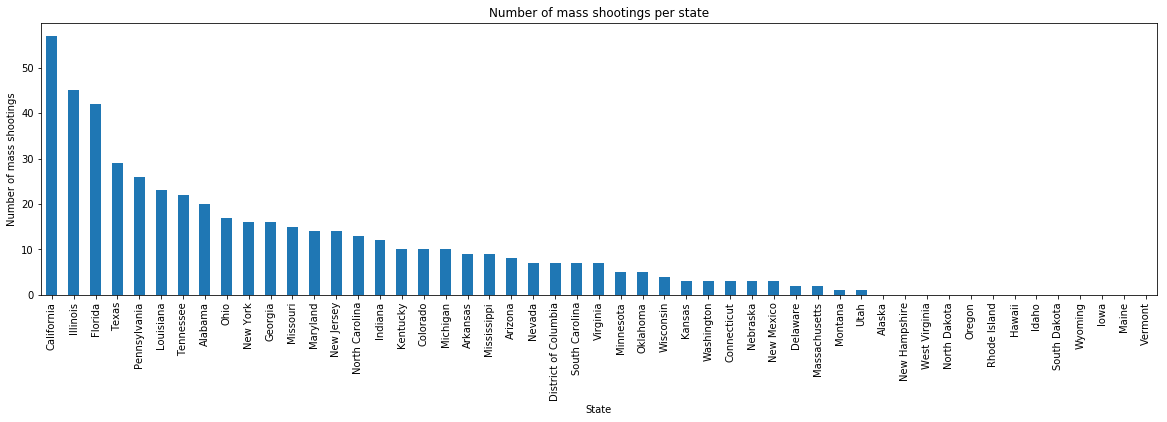

In [0]:
shootings_sorted = shootings_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)
shootings_sorted.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Number of mass shootings per state")
plt.xlabel("State")
plt.ylabel("Number of mass shootings")
plt.show()

In [0]:
# Mass shootings
shootings_df['State'].value_counts().reindex(states, fill_value=0).sort_values(ascending=False)

California              57
Illinois                45
Florida                 42
Texas                   29
Pennsylvania            26
Louisiana               23
Tennessee               22
Alabama                 20
Ohio                    17
New York                16
Georgia                 16
Missouri                15
Maryland                14
New Jersey              14
North Carolina          13
Indiana                 12
Kentucky                10
Colorado                10
Michigan                10
Arkansas                 9
Mississippi              9
Arizona                  8
Nevada                   7
District of Columbia     7
South Carolina           7
Virginia                 7
Minnesota                5
Oklahoma                 5
Wisconsin                4
Kansas                   3
Washington               3
Connecticut              3
Nebraska                 3
New Mexico               3
Delaware                 2
Massachusetts            2
Montana                  1
U

In [0]:
injuries = injuries_df['State'].value_counts().reindex(states, fill_value=0).values.tolist()

In [0]:
deaths = deaths_df['State'].value_counts().reindex(states, fill_value=0).values.tolist()

In [0]:
shootings = shootings_df['State'].value_counts().reindex(states, fill_value=0).values.tolist()

In [0]:
df = pd.DataFrame({'injuries': injuries, 'deaths': deaths, 'shootings': shootings}, index=states)

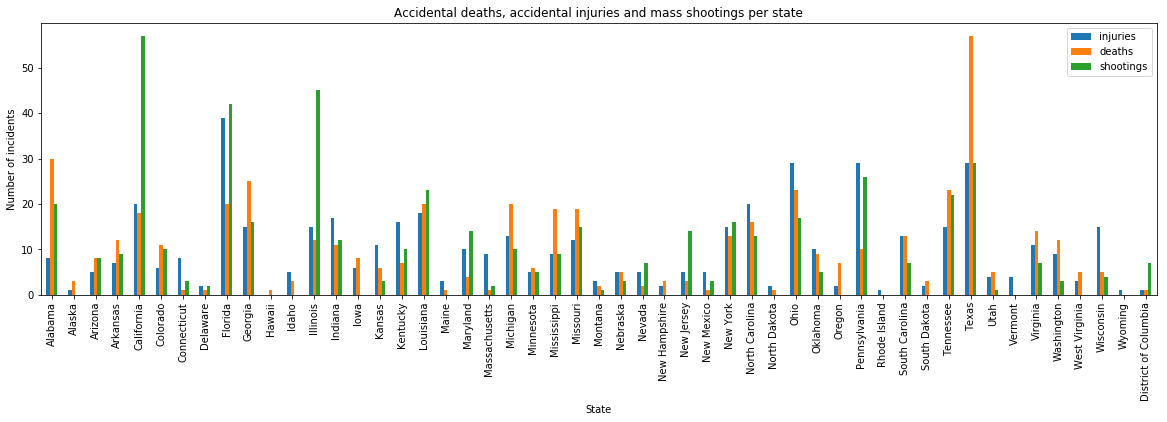

In [0]:
# Accidental deaths, accidental injuries and mass shootings per state
df.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Accidental deaths, accidental injuries and mass shootings per state")
plt.xlabel("State")
plt.ylabel("Number of incidents")
plt.show()

# **PART 2**

In [0]:
census_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/census.csv'
census_df = pd.read_csv(census_url, thousands=',') # the thousands parameter gets rid of the commas in the df
census_df = census_df.rename(index=str, columns={"Geographic Area\n\n": "State"})
census_df = census_df.drop(columns=['2010', '2011', '2012', '2013', '2014', '2015', '2016'])

In [0]:
# import the datasets:
import pandas as pd
shootings_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings.csv'
shootings_df = pd.read_csv(shootings_url)


In [0]:
shootings_df['Year'] = shootings_df['Incident Date'].str.split().str.get(2)
shootings_df = shootings_df.drop(columns=['Address', 'Incident Date', 'City Or County', 'Operations'])
shootings_df = shootings_df.loc[(shootings_df['Year'] <'2019') & (shootings_df['Year'] >= '2017')]
numKilledInjured = shootings_df.groupby(['State', 'Year'], as_index=False)[["# Killed", "# Injured"]].sum()

In [0]:
# Change order of states to match that of the census df
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [0]:
numKilledInjured = numKilledInjured.pivot(index='State', columns='Year', values=['# Killed', '# Injured']).reindex(states).reset_index('State')

In [0]:
numKilledInjured.fillna(value=0, inplace=True)

In [0]:
killed = numKilledInjured.values[:, 1:3] / census_df.values[:, 1:]
injured = numKilledInjured.values[:, 3:] / census_df.values[:, 1:]

In [0]:
probs_df = pd.DataFrame({'State':states, 'Killed Prob 2017': killed[:, 0], 'Killed Prob 2018': killed[:, 1], 'Injured Prob 2017': injured[:, 0], 'Injured Prob 2018': injured[:, 1]})

In [0]:
probs_df = probs_df.set_index('State')

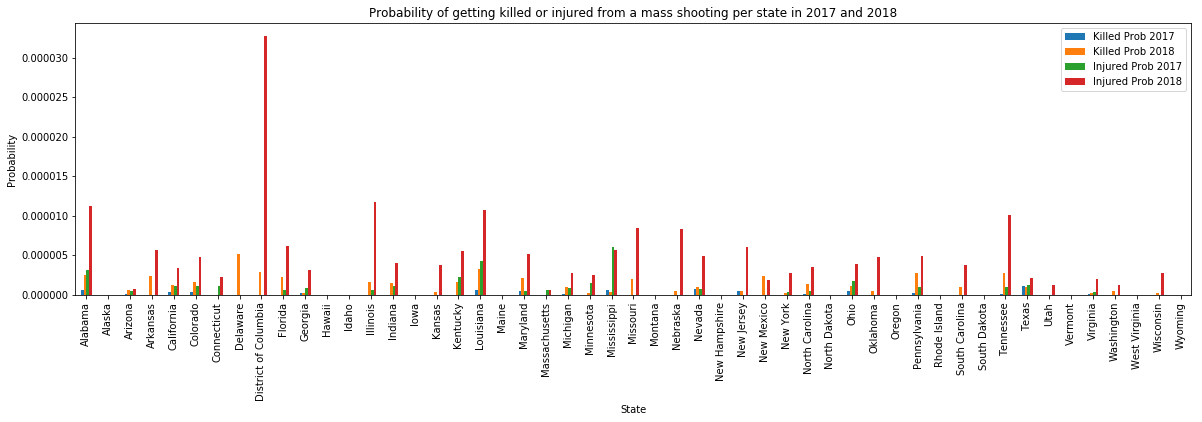

In [0]:
probs_df.plot(figsize=(20, 5), kind="bar", align="center")
plt.title("Probability of getting killed or injured from a mass shooting per state in 2017 and 2018")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()

# Part 3 - Linear Regression on # Killed and # Injured

In [0]:
import pandas as pd
census_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/census.csv'
census_df = pd.read_csv(census_url, thousands=',') # the thousands parameter gets rid of the commas in the df

census_df = census_df.rename(index=str, columns={"Geographic Area\n\n": "State"})

census_df = census_df.drop(columns=['2010', '2011', '2012', '2013'])

In [0]:
shootings_2014_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2014.csv'
shootings_2015_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2015.csv'
shootings_2016_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2016.csv'
shootings_2017_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2017.csv'
shootings_2018_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2018.csv'
shootings_2014 = pd.read_csv(shootings_2014_url)
shootings_2015 = pd.read_csv(shootings_2015_url)
shootings_2016 = pd.read_csv(shootings_2016_url)
shootings_2017 = pd.read_csv(shootings_2017_url)
shootings_2018 = pd.read_csv(shootings_2018_url)

In [0]:
shootings_df = shootings_2014.append([shootings_2015, shootings_2016, shootings_2017, shootings_2018])

In [0]:
shootings_df['Month'] = shootings_df['Incident Date'].str.split().str.get(0)
shootings_df['Year'] = shootings_df['Incident Date'].str.split().str.get(2)
shootings_df = shootings_df.drop(columns=['Address', 'Incident Date', 'City Or County', 'Operations'])

In [0]:
shootings_df = shootings_df.loc[(shootings_df['Year'] < '2019') & (shootings_df['Year'] >= '2014')]

In [0]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [0]:
months.sort()

In [0]:
# Change order of states to match that of the census df
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [0]:
import itertools 
lists = [states, months]
state_month = pd.DataFrame(list(itertools.product(*lists)), columns=['State', 'Month'])

In [0]:
census_spread = census_df.merge(state_month, left_on=['State'], right_on=['State'], how='outer')

In [0]:
years = ['2014', '2015', '2016', '2017', '2018']
import itertools 
lists = [states, months, years]
state_month_year = pd.DataFrame(list(itertools.product(*lists)), columns=['State', 'Month', 'Year'])

In [0]:
shootings_df = shootings_df.merge(state_month_year, left_on=['State', 'Month', 'Year'], right_on=['State', 'Month', 'Year'], how='outer')

In [0]:
shootings_df = shootings_df.groupby(['State', 'Year', 'Month'], as_index=False)[["# Killed", "# Injured"]].sum()

In [0]:
shootings_df = shootings_df.pivot_table(index=['State', 'Month'], columns='Year', values=['# Killed', '# Injured']).reset_index()

In [0]:
injured = shootings_df.values[:, 2:7] / census_spread.values[:, 1: 6]

In [0]:
killed = shootings_df.values[:, 7:] / census_spread.values[:, 1: 6]

In [0]:
# pd.DataFrame({ 'Injured Prob 2017': injured[:, 0], 'Injured Prob 2018': injured[:, 1], 'Killed Prob 2017': killed[:, 0], 'Killed Prob 2018': killed[:, 1]})
data2014 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2014', '# Killed': killed[:, 0], '# Injured': injured[:, 0]})

In [0]:
data2015 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2015', '# Killed': killed[:, 1], '# Injured': injured[:, 1]})

In [0]:
data2016 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2016', '# Killed': killed[:, 2], '# Injured': injured[:, 2]})

In [0]:
data2017 = pd.DataFrame({'State':shootings_df.State, 'Month':shootings_df.Month, 'Year': '2017', '# Killed': killed[:, 3], '# Injured': injured[:, 3]})

In [0]:
data2018 = pd.DataFrame({'State': shootings_df.State, 'Month': shootings_df.Month, 'Year': '2018', '# Killed':killed[:, 4], '# Injured': injured[:, 4] })

In [0]:
probs_mass_shootings = data2014.append([data2015, data2016, data2017, data2018], sort=False)

### STARTING BACKGROUND CHECKS NORMALIZING ###

In [0]:
checks_url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
checks_df = pd.read_csv(checks_url)

In [0]:
for state in ["Mariana Islands", "Puerto Rico", "Virgin Island", "Guam"]:
  checks_df = checks_df[~checks_df.state.str.contains(state)]


In [0]:
checks_df = checks_df.loc[(checks_df['month'] >= '2014-01') & (checks_df['month'] < '2019-01')]

In [0]:
checks_df['Year'] = checks_df['month'].str.split('-').str.get(0)
checks_df['Month'] = checks_df['month'].str.split('-').str.get(1)

In [0]:
checks_df = checks_df.reset_index(drop=True)


In [0]:
checks_df = checks_df.rename(index=str, columns={"state": "State"})

In [0]:
checks_df = checks_df.drop(columns=['month'])

In [0]:
months = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

In [0]:
checks_df['Month'] = checks_df['Month'].apply(lambda x: months[x])

In [0]:
checks_df.fillna(0.0,inplace=True)

### MERGE ###

In [0]:
checks_df = checks_df.merge(state_month_year, left_on=['State', 'Month', 'Year'], right_on=['State', 'Month', 'Year'], how='outer')

In [0]:
all_cols_checks = ['permit', 'permit_recheck', 'handgun', 'long_gun',
                 'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']

In [0]:
checks_df = checks_df.pivot_table(index=['State', 'Month'], columns='Year', values=all_cols_checks).reset_index()

In [0]:
import numpy as np
permit = np.array(checks_df['permit']) / census_spread.values[:, 1:6]
permit_recheck = np.array(checks_df['permit_recheck']) / census_spread.values[:, 1:6]
handgun = np.array(checks_df['handgun']) / census_spread.values[:, 1:6]
long_gun = np.array(checks_df['long_gun']) / census_spread.values[:, 1:6]
other = np.array(checks_df['other']) / census_spread.values[:, 1:6]
multiple = np.array(checks_df['multiple']) / census_spread.values[:, 1:6]
admin = np.array(checks_df['admin']) / census_spread.values[:, 1:6]
prepawn_handgun = np.array(checks_df['prepawn_handgun']) / census_spread.values[:, 1:6]
prepawn_long_gun = np.array(checks_df['prepawn_long_gun']) / census_spread.values[:, 1:6]
prepawn_other = np.array(checks_df['prepawn_other']) / census_spread.values[:, 1:6]
redemption_handgun = np.array(checks_df['redemption_handgun']) / census_spread.values[:, 1:6]
redemption_long_gun = np.array(checks_df['redemption_long_gun']) / census_spread.values[:, 1:6]
redemption_other = np.array(checks_df['redemption_other']) / census_spread.values[:, 1:6]
returned_handgun = np.array(checks_df['returned_handgun']) / census_spread.values[:, 1:6]
returned_long_gun = np.array(checks_df['returned_long_gun']) / census_spread.values[:, 1:6]
returned_other = np.array(checks_df['returned_other']) / census_spread.values[:, 1:6]
rentals_handgun = np.array(checks_df['rentals_handgun']) / census_spread.values[:, 1:6]
rentals_long_gun = np.array(checks_df['rentals_long_gun']) / census_spread.values[:, 1:6]
private_sale_handgun = np.array(checks_df['private_sale_handgun']) / census_spread.values[:, 1:6]
private_sale_long_gun = np.array(checks_df['private_sale_long_gun']) / census_spread.values[:, 1:6]
private_sale_other = np.array(checks_df['private_sale_other']) / census_spread.values[:, 1:6]
return_to_seller_handgun = np.array(checks_df['return_to_seller_handgun']) / census_spread.values[:, 1:6]
return_to_seller_long_gun = np.array(checks_df['return_to_seller_long_gun']) / census_spread.values[:, 1:6]
return_to_seller_other = np.array(checks_df['return_to_seller_other']) / census_spread.values[:, 1:6]
totals = np.array(checks_df['totals']) / census_spread.values[:, 1:6]


In [0]:
# pd.DataFrame({ 'Injured Prob 2017': injured[:, 0], 'Injured Prob 2018': injured[:, 1], 'Killed Prob 2017': killed[:, 0], 'Killed Prob 2018': killed[:, 1]})
checks2014 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2014', 'permit': permit[:, 0], 'permit_recheck': permit_recheck[:, 0], 'handgun': handgun[:, 0], 'long_gun': long_gun[:, 0], 'other': other[:, 0], 'multiple':multiple[:, 0], 'admin': admin[:, 0], 'prepawn_handgun':prepawn_handgun[:, 0], 'prepawn_long_gun': prepawn_long_gun[:, 0], 'prepawn_other':prepawn_other[:,0], 'redemption_handgun':redemption_handgun[:, 0], 'redemption_long_gun': redemption_long_gun[:, 0], 'redemption_other': redemption_other[:,0], 'returned_handgun':returned_handgun[:, 0],'returned_long_gun':returned_long_gun[:,0],'returned_other':returned_other[:,0],'rentals_handgun':rentals_handgun[:,0], 'rentals_long_gun':rentals_long_gun[:,0], 'private_sale_handgun':private_sale_handgun[:,0],'private_sale_long_gun':private_sale_long_gun[:,0], 'private_sale_other':private_sale_other[:,0], 'return_to_seller_handgun':return_to_seller_handgun[:,0],'return_to_seller_long_gun':return_to_seller_long_gun[:,0], 'return_to_seller_other':return_to_seller_other[:,0], 'totals':totals[:,0]         })

In [0]:
checks2015 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2015', 'permit': permit[:, 1], 'permit_recheck': permit_recheck[:, 1], 'handgun': handgun[:, 1], 'long_gun': long_gun[:,1], 'other': other[:, 1], 'multiple':multiple[:, 1], 'admin': admin[:, 1], 'prepawn_handgun':prepawn_handgun[:, 1], 'prepawn_long_gun': prepawn_long_gun[:, 1], 'prepawn_other':prepawn_other[:,1], 'redemption_handgun':redemption_handgun[:, 1], 'redemption_long_gun': redemption_long_gun[:, 1], 'redemption_other': redemption_other[:,1], 'returned_handgun':returned_handgun[:, 1],'returned_long_gun':returned_long_gun[:,1],'returned_other':returned_other[:,1],'rentals_handgun':rentals_handgun[:,1], 'rentals_long_gun':rentals_long_gun[:,1], 'private_sale_handgun':private_sale_handgun[:,1],'private_sale_long_gun':private_sale_long_gun[:,1], 'private_sale_other':private_sale_other[:,1], 'return_to_seller_handgun':return_to_seller_handgun[:,1],'return_to_seller_long_gun':return_to_seller_long_gun[:,1], 'return_to_seller_other':return_to_seller_other[:,1], 'totals':totals[:,1]         })

In [0]:
checks2016 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2016', 'permit': permit[:, 2], 'permit_recheck': permit_recheck[:, 2], 'handgun': handgun[:,2], 'long_gun': long_gun[:,2], 'other': other[:, 2], 'multiple':multiple[:, 2], 'admin': admin[:, 2], 'prepawn_handgun':prepawn_handgun[:, 2], 'prepawn_long_gun': prepawn_long_gun[:, 2], 'prepawn_other':prepawn_other[:,2], 'redemption_handgun':redemption_handgun[:, 2], 'redemption_long_gun': redemption_long_gun[:, 2], 'redemption_other': redemption_other[:,1], 'returned_handgun':returned_handgun[:, 2],'returned_long_gun':returned_long_gun[:,2],'returned_other':returned_other[:,2],'rentals_handgun':rentals_handgun[:,2], 'rentals_long_gun':rentals_long_gun[:,2], 'private_sale_handgun':private_sale_handgun[:,2],'private_sale_long_gun':private_sale_long_gun[:,2], 'private_sale_other':private_sale_other[:,2], 'return_to_seller_handgun':return_to_seller_handgun[:,2],'return_to_seller_long_gun':return_to_seller_long_gun[:,2], 'return_to_seller_other':return_to_seller_other[:,2], 'totals':totals[:,2]         })

In [0]:
checks2017 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2017', 'permit': permit[:, 3], 'permit_recheck': permit_recheck[:, 3], 'handgun': handgun[:, 3], 'long_gun': long_gun[:,3], 'other': other[:, 3], 'multiple':multiple[:, 3], 'admin': admin[:, 3], 'prepawn_handgun':prepawn_handgun[:, 3], 'prepawn_long_gun': prepawn_long_gun[:, 3], 'prepawn_other':prepawn_other[:,3], 'redemption_handgun':redemption_handgun[:, 3], 'redemption_long_gun': redemption_long_gun[:, 3], 'redemption_other': redemption_other[:,3], 'returned_handgun':returned_handgun[:, 3],'returned_long_gun':returned_long_gun[:,3],'returned_other':returned_other[:,3],'rentals_handgun':rentals_handgun[:,3], 'rentals_long_gun':rentals_long_gun[:,3], 'private_sale_handgun':private_sale_handgun[:,3],'private_sale_long_gun':private_sale_long_gun[:,3], 'private_sale_other':private_sale_other[:,3], 'return_to_seller_handgun':return_to_seller_handgun[:,3],'return_to_seller_long_gun':return_to_seller_long_gun[:,3], 'return_to_seller_other':return_to_seller_other[:,3], 'totals':totals[:,3]         })

In [0]:
checks2018 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2018', 'permit': permit[:, 4], 'permit_recheck': permit_recheck[:, 4], 'handgun': handgun[:, 4], 'long_gun': long_gun[:,4], 'other': other[:, 4], 'multiple':multiple[:, 4], 'admin': admin[:, 4], 'prepawn_handgun':prepawn_handgun[:, 4], 'prepawn_long_gun': prepawn_long_gun[:, 4], 'prepawn_other':prepawn_other[:,4], 'redemption_handgun':redemption_handgun[:, 4], 'redemption_long_gun': redemption_long_gun[:, 4], 'redemption_other': redemption_other[:,4], 'returned_handgun':returned_handgun[:, 4],'returned_long_gun':returned_long_gun[:,4],'returned_other':returned_other[:,4],'rentals_handgun':rentals_handgun[:,4], 'rentals_long_gun':rentals_long_gun[:,4], 'private_sale_handgun':private_sale_handgun[:,4],'private_sale_long_gun':private_sale_long_gun[:,4], 'private_sale_other':private_sale_other[:,4], 'return_to_seller_handgun':return_to_seller_handgun[:,4],'return_to_seller_long_gun':return_to_seller_long_gun[:,4], 'return_to_seller_other':return_to_seller_other[:,4], 'totals':totals[:,4]         })

In [0]:
probs_checks = checks2014.append([checks2015, checks2016, checks2017, checks2018], sort=False)

In [0]:
checks_vs_ms = probs_checks.merge(probs_mass_shootings, left_on=['State', 'Year', 'Month'], right_on=['State', 'Year', 'Month'], how='outer')

In [0]:
checks_vs_ms['# Killed'].fillna(0, inplace = True)
checks_vs_ms['# Injured'].fillna(0, inplace = True)

In [0]:
checks_vs_ms.fillna(0.0, inplace=True)

In [0]:
type_of_check = ['permit', 'permit_recheck', 'handgun', 'long_gun',
                 'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']

for toc in type_of_check:
    print("Correlation between", toc, "and # Killed:",
          checks_vs_ms[toc].corr(checks_vs_ms['# Killed']))
   

Correlation between permit and # Killed: -0.01030611602657353
Correlation between permit_recheck and # Killed: 0.011861603416304572
Correlation between handgun and # Killed: 0.004200477036011945
Correlation between long_gun and # Killed: -0.013161963315024653
Correlation between other and # Killed: 0.0040131527505097185
Correlation between multiple and # Killed: 0.017166538390896574
Correlation between admin and # Killed: -0.01235124541044552
Correlation between prepawn_handgun and # Killed: 0.006953111984990614
Correlation between prepawn_long_gun and # Killed: 0.017324833098446617
Correlation between prepawn_other and # Killed: 0.021852407221244274
Correlation between redemption_handgun and # Killed: 0.026529209130795133
Correlation between redemption_long_gun and # Killed: 0.0037246397069935645
Correlation between redemption_other and # Killed: -0.018117345123106324
Correlation between returned_handgun and # Killed: -0.0067431105736606035
Correlation between returned_long_gun and # 

In [0]:
X = checks_vs_ms[type_of_check] # Features to train on
y = checks_vs_ms[['# Killed', '# Injured']]
y_k = checks_vs_ms['# Killed']
y_i = checks_vs_ms['# Injured']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
lm.score(X_train, y_train)

0.04669242660588906

In [0]:
predictions = lm.predict(X_test)

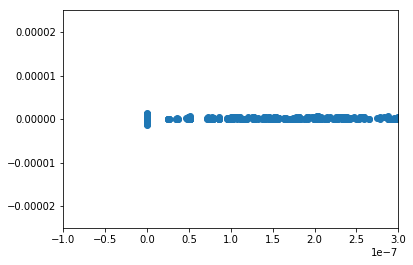

In [0]:
import matplotlib.pyplot as plt 
plt.xlim([-0.0000001, 0.0000003])
plt.ylim([-0.000025, 0.000025])
plt.scatter(y_test,predictions)


# Part 4 - Linear Regression on Mass Shooting Incidents in General

In [0]:
import pandas as pd

census_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/census.csv'
census_df = pd.read_csv(census_url, thousands=',') # the thousands parameter gets rid of the commas in the df
census_df = census_df.rename(index=str, columns={"Geographic Area\n\n": "State"})
census_df = census_df.drop(columns=['2010', '2011', '2012', '2013'])

shootings_2014_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2014.csv'
shootings_2015_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2015.csv'
shootings_2016_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2016.csv'
shootings_2017_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2017.csv'
shootings_2018_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2018.csv'
shootings_2014 = pd.read_csv(shootings_2014_url)
shootings_2015 = pd.read_csv(shootings_2015_url)
shootings_2016 = pd.read_csv(shootings_2016_url)
shootings_2017 = pd.read_csv(shootings_2017_url)
shootings_2018 = pd.read_csv(shootings_2018_url)

In [0]:
shootings_df = shootings_2014.append([shootings_2015, shootings_2016, shootings_2017, shootings_2018])

In [0]:
shootings_df['Month'] = shootings_df['Incident Date'].str.split().str.get(0)
shootings_df['Year'] = shootings_df['Incident Date'].str.split().str.get(2)
shootings_df = shootings_df.drop(columns=['Address', 'Incident Date', 'City Or County', 'Operations'])

In [0]:
shootings_df = shootings_df.loc[(shootings_df['Year'] < '2019') & (shootings_df['Year'] >= '2014')]

In [0]:
shootings_df['# Incidents'] = 1

In [0]:
# Change order of states to match that of the census df
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [0]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [0]:
months.sort()

In [0]:
years = ['2014', '2015', '2016', '2017', '2018']
import itertools 
lists = [states, months, years]
state_month_year = pd.DataFrame(list(itertools.product(*lists)), columns=['State', 'Month', 'Year'])

In [0]:
shootings_df = shootings_df.merge(state_month_year, left_on=['State', 'Month', 'Year'], right_on=['State', 'Month', 'Year'], how='outer')

In [0]:
shootings_df = shootings_df.groupby(['State', 'Year', 'Month'], as_index=False)['# Incidents'].sum()

In [12]:
shootings_df

,State,Year,Month,# Incidents
0,Alabama,2014,April,0.0
1,Alabama,2014,August,0.0
2,Alabama,2014,December,0.0
3,Alabama,2014,February,0.0
4,Alabama,2014,January,1.0
5,Alabama,2014,July,0.0
6,Alabama,2014,June,1.0
7,Alabama,2014,March,0.0
8,Alabama,2014,May,0.0
9,Alabama,2014,November,0.0


In [0]:
shootings_df = shootings_df.pivot_table(index=['State', 'Month'], columns='Year', values='# Incidents').reset_index()

In [0]:
shootings_df.fillna(0,inplace=True)

In [0]:
import itertools 
lists = [states, months]
state_month = pd.DataFrame(list(itertools.product(*lists)), columns=['State', 'Month'])

In [0]:
census_spread = census_df.merge(state_month, left_on=['State'], right_on=['State'], how='outer')

In [0]:
normalized_shootings = shootings_df.values[:, 2:] / census_spread.values[:, 1:6]

In [0]:
data2014 = pd.DataFrame({'State': shootings_df.State, 'Month': shootings_df.Month, 'Year': '2014', 'Incident Prob': normalized_shootings[:, 0]})
data2015 = pd.DataFrame({'State': shootings_df.State, 'Month': shootings_df.Month, 'Year': '2015', 'Incident Prob': normalized_shootings[:, 1]})
data2016 = pd.DataFrame({'State': shootings_df.State, 'Month': shootings_df.Month, 'Year': '2016', 'Incident Prob': normalized_shootings[:, 2]})
data2017 = pd.DataFrame({'State': shootings_df.State, 'Month': shootings_df.Month, 'Year': '2017', 'Incident Prob': normalized_shootings[:, 3]})
data2018 = pd.DataFrame({'State': shootings_df.State, 'Month': shootings_df.Month, 'Year': '2018', 'Incident Prob': normalized_shootings[:, 4]})

In [0]:
probs_incidents = data2014.append([data2015, data2016, data2017, data2018], sort=False)

In [0]:
checks_url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
checks_df = pd.read_csv(checks_url)

In [0]:
for state in ["Mariana Islands", "Puerto Rico", "Virgin Island", "Guam"]:
  checks_df = checks_df[~checks_df.state.str.contains(state)]


In [0]:
checks_df = checks_df.loc[(checks_df['month'] >= '2014-01') & (checks_df['month'] < '2019-01')]
checks_df['Year'] = checks_df['month'].str.split('-').str.get(0)
checks_df['Month'] = checks_df['month'].str.split('-').str.get(1)
checks_df = checks_df.reset_index(drop=True)
checks_df = checks_df.rename(index=str, columns={"state": "State"})
checks_df = checks_df.drop(columns=['month'])
months = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}
checks_df['Month'] = checks_df['Month'].apply(lambda x: months[x])
checks_df.fillna(0.0,inplace=True)

In [0]:
checks_df = checks_df.merge(state_month_year, left_on=['State', 'Month', 'Year'], right_on=['State', 'Month', 'Year'], how='outer')
all_cols_checks = ['permit', 'permit_recheck', 'handgun', 'long_gun',
                 'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']
checks_df = checks_df.pivot_table(index=['State', 'Month'], columns='Year', values=all_cols_checks).reset_index()

In [0]:
import numpy as np
permit = np.array(checks_df['permit']) / census_spread.values[:, 1:6]
permit_recheck = np.array(checks_df['permit_recheck']) / census_spread.values[:, 1:6]
handgun = np.array(checks_df['handgun']) / census_spread.values[:, 1:6]
long_gun = np.array(checks_df['long_gun']) / census_spread.values[:, 1:6]
other = np.array(checks_df['other']) / census_spread.values[:, 1:6]
multiple = np.array(checks_df['multiple']) / census_spread.values[:, 1:6]
admin = np.array(checks_df['admin']) / census_spread.values[:, 1:6]
prepawn_handgun = np.array(checks_df['prepawn_handgun']) / census_spread.values[:, 1:6]
prepawn_long_gun = np.array(checks_df['prepawn_long_gun']) / census_spread.values[:, 1:6]
prepawn_other = np.array(checks_df['prepawn_other']) / census_spread.values[:, 1:6]
redemption_handgun = np.array(checks_df['redemption_handgun']) / census_spread.values[:, 1:6]
redemption_long_gun = np.array(checks_df['redemption_long_gun']) / census_spread.values[:, 1:6]
redemption_other = np.array(checks_df['redemption_other']) / census_spread.values[:, 1:6]
returned_handgun = np.array(checks_df['returned_handgun']) / census_spread.values[:, 1:6]
returned_long_gun = np.array(checks_df['returned_long_gun']) / census_spread.values[:, 1:6]
returned_other = np.array(checks_df['returned_other']) / census_spread.values[:, 1:6]
rentals_handgun = np.array(checks_df['rentals_handgun']) / census_spread.values[:, 1:6]
rentals_long_gun = np.array(checks_df['rentals_long_gun']) / census_spread.values[:, 1:6]
private_sale_handgun = np.array(checks_df['private_sale_handgun']) / census_spread.values[:, 1:6]
private_sale_long_gun = np.array(checks_df['private_sale_long_gun']) / census_spread.values[:, 1:6]
private_sale_other = np.array(checks_df['private_sale_other']) / census_spread.values[:, 1:6]
return_to_seller_handgun = np.array(checks_df['return_to_seller_handgun']) / census_spread.values[:, 1:6]
return_to_seller_long_gun = np.array(checks_df['return_to_seller_long_gun']) / census_spread.values[:, 1:6]
return_to_seller_other = np.array(checks_df['return_to_seller_other']) / census_spread.values[:, 1:6]
totals = np.array(checks_df['totals']) / census_spread.values[:, 1:6]


In [0]:
checks2014 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2014', 'permit': permit[:, 0], 'permit_recheck': permit_recheck[:, 0], 'handgun': handgun[:, 0], 'long_gun': long_gun[:, 0], 'other': other[:, 0], 'multiple':multiple[:, 0], 'admin': admin[:, 0], 'prepawn_handgun':prepawn_handgun[:, 0], 'prepawn_long_gun': prepawn_long_gun[:, 0], 'prepawn_other':prepawn_other[:,0], 'redemption_handgun':redemption_handgun[:, 0], 'redemption_long_gun': redemption_long_gun[:, 0], 'redemption_other': redemption_other[:,0], 'returned_handgun':returned_handgun[:, 0],'returned_long_gun':returned_long_gun[:,0],'returned_other':returned_other[:,0],'rentals_handgun':rentals_handgun[:,0], 'rentals_long_gun':rentals_long_gun[:,0], 'private_sale_handgun':private_sale_handgun[:,0],'private_sale_long_gun':private_sale_long_gun[:,0], 'private_sale_other':private_sale_other[:,0], 'return_to_seller_handgun':return_to_seller_handgun[:,0],'return_to_seller_long_gun':return_to_seller_long_gun[:,0], 'return_to_seller_other':return_to_seller_other[:,0], 'totals':totals[:,0]         })
checks2015 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2015', 'permit': permit[:, 1], 'permit_recheck': permit_recheck[:, 1], 'handgun': handgun[:, 1], 'long_gun': long_gun[:,1], 'other': other[:, 1], 'multiple':multiple[:, 1], 'admin': admin[:, 1], 'prepawn_handgun':prepawn_handgun[:, 1], 'prepawn_long_gun': prepawn_long_gun[:, 1], 'prepawn_other':prepawn_other[:,1], 'redemption_handgun':redemption_handgun[:, 1], 'redemption_long_gun': redemption_long_gun[:, 1], 'redemption_other': redemption_other[:,1], 'returned_handgun':returned_handgun[:, 1],'returned_long_gun':returned_long_gun[:,1],'returned_other':returned_other[:,1],'rentals_handgun':rentals_handgun[:,1], 'rentals_long_gun':rentals_long_gun[:,1], 'private_sale_handgun':private_sale_handgun[:,1],'private_sale_long_gun':private_sale_long_gun[:,1], 'private_sale_other':private_sale_other[:,1], 'return_to_seller_handgun':return_to_seller_handgun[:,1],'return_to_seller_long_gun':return_to_seller_long_gun[:,1], 'return_to_seller_other':return_to_seller_other[:,1], 'totals':totals[:,1]         })
checks2016 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2016', 'permit': permit[:, 2], 'permit_recheck': permit_recheck[:, 2], 'handgun': handgun[:,2], 'long_gun': long_gun[:,2], 'other': other[:, 2], 'multiple':multiple[:, 2], 'admin': admin[:, 2], 'prepawn_handgun':prepawn_handgun[:, 2], 'prepawn_long_gun': prepawn_long_gun[:, 2], 'prepawn_other':prepawn_other[:,2], 'redemption_handgun':redemption_handgun[:, 2], 'redemption_long_gun': redemption_long_gun[:, 2], 'redemption_other': redemption_other[:,1], 'returned_handgun':returned_handgun[:, 2],'returned_long_gun':returned_long_gun[:,2],'returned_other':returned_other[:,2],'rentals_handgun':rentals_handgun[:,2], 'rentals_long_gun':rentals_long_gun[:,2], 'private_sale_handgun':private_sale_handgun[:,2],'private_sale_long_gun':private_sale_long_gun[:,2], 'private_sale_other':private_sale_other[:,2], 'return_to_seller_handgun':return_to_seller_handgun[:,2],'return_to_seller_long_gun':return_to_seller_long_gun[:,2], 'return_to_seller_other':return_to_seller_other[:,2], 'totals':totals[:,2]         })
checks2017 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2017', 'permit': permit[:, 3], 'permit_recheck': permit_recheck[:, 3], 'handgun': handgun[:, 3], 'long_gun': long_gun[:,3], 'other': other[:, 3], 'multiple':multiple[:, 3], 'admin': admin[:, 3], 'prepawn_handgun':prepawn_handgun[:, 3], 'prepawn_long_gun': prepawn_long_gun[:, 3], 'prepawn_other':prepawn_other[:,3], 'redemption_handgun':redemption_handgun[:, 3], 'redemption_long_gun': redemption_long_gun[:, 3], 'redemption_other': redemption_other[:,3], 'returned_handgun':returned_handgun[:, 3],'returned_long_gun':returned_long_gun[:,3],'returned_other':returned_other[:,3],'rentals_handgun':rentals_handgun[:,3], 'rentals_long_gun':rentals_long_gun[:,3], 'private_sale_handgun':private_sale_handgun[:,3],'private_sale_long_gun':private_sale_long_gun[:,3], 'private_sale_other':private_sale_other[:,3], 'return_to_seller_handgun':return_to_seller_handgun[:,3],'return_to_seller_long_gun':return_to_seller_long_gun[:,3], 'return_to_seller_other':return_to_seller_other[:,3], 'totals':totals[:,3]         })
checks2018 = pd.DataFrame({'State':checks_df.State, 'Month':checks_df.Month, 'Year': '2018', 'permit': permit[:, 4], 'permit_recheck': permit_recheck[:, 4], 'handgun': handgun[:, 4], 'long_gun': long_gun[:,4], 'other': other[:, 4], 'multiple':multiple[:, 4], 'admin': admin[:, 4], 'prepawn_handgun':prepawn_handgun[:, 4], 'prepawn_long_gun': prepawn_long_gun[:, 4], 'prepawn_other':prepawn_other[:,4], 'redemption_handgun':redemption_handgun[:, 4], 'redemption_long_gun': redemption_long_gun[:, 4], 'redemption_other': redemption_other[:,4], 'returned_handgun':returned_handgun[:, 4],'returned_long_gun':returned_long_gun[:,4],'returned_other':returned_other[:,4],'rentals_handgun':rentals_handgun[:,4], 'rentals_long_gun':rentals_long_gun[:,4], 'private_sale_handgun':private_sale_handgun[:,4],'private_sale_long_gun':private_sale_long_gun[:,4], 'private_sale_other':private_sale_other[:,4], 'return_to_seller_handgun':return_to_seller_handgun[:,4],'return_to_seller_long_gun':return_to_seller_long_gun[:,4], 'return_to_seller_other':return_to_seller_other[:,4], 'totals':totals[:,4]         })
probs_checks = checks2014.append([checks2015, checks2016, checks2017, checks2018], sort=False)

In [0]:
checks_vs_ms = probs_checks.merge(probs_incidents, left_on=['State', 'Year', 'Month'], right_on=['State', 'Year', 'Month'], how='outer')

In [0]:
checks_vs_ms['Incident Prob'].fillna(0, inplace = True)
checks_vs_ms.fillna(0, inplace=True)

In [29]:
type_of_check = ['permit', 'permit_recheck', 'handgun', 'long_gun',
                 'other', 'multiple', 'admin', 'prepawn_handgun', 
                 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
                 'redemption_long_gun', 'redemption_other', 'returned_handgun',
                 'returned_long_gun', 'returned_other', 'rentals_handgun', 
                 'rentals_long_gun', 'private_sale_handgun',
                 'private_sale_long_gun', 'private_sale_other',
                 'return_to_seller_handgun', 'return_to_seller_long_gun', 
                 'return_to_seller_other', 'totals']

# Largest correlation is with long_gun 
for toc in type_of_check:
    print("Correlation between", toc, "and Incident Prob:",
          checks_vs_ms[toc].corr(checks_vs_ms['Incident Prob']))
   

Correlation between permit and Incident Prob: -0.0065090614702390266
Correlation between permit_recheck and Incident Prob: 0.06796348204641763
Correlation between handgun and Incident Prob: -0.0815137094946248
Correlation between long_gun and Incident Prob: -0.13473973252267676
Correlation between other and Incident Prob: -0.09263645844208003
Correlation between multiple and Incident Prob: -0.07029968484099731
Correlation between admin and Incident Prob: -0.027108602657016548
Correlation between prepawn_handgun and Incident Prob: -0.015261090796235591
Correlation between prepawn_long_gun and Incident Prob: -0.029278966923847908
Correlation between prepawn_other and Incident Prob: -0.02379260974637171
Correlation between redemption_handgun and Incident Prob: -0.0288275298368221
Correlation between redemption_long_gun and Incident Prob: -0.06141898122158854
Correlation between redemption_other and Incident Prob: -0.04893190066165878
Correlation between returned_handgun and Incident Prob:

In [0]:
X = checks_vs_ms[[toc]] # Features to train on
y = checks_vs_ms[['Incident Prob']]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lm.score(X_train, y_train)

0.002832270767965217

In [0]:
predictions = lm.predict(X_test)

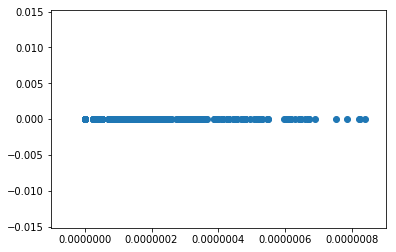

In [35]:
import matplotlib.pyplot as plt
plt.xlim(-0.0000001, 0.0000009)
plt.scatter(y_test,predictions)


In [0]:
# Still not improvement...

# Other models

## Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt_k = GradientBoostingRegressor()
gbrt_i = GradientBoostingRegressor()

X_train, X_test, y_train_k, y_test_k = train_test_split(X, y_k, test_size=0.75, random_state=101)
X_train, X_test, y_train_i, y_test_i = train_test_split(X, y_i, test_size=0.75, random_state=101)

gbrt_k.fit(X_train, y_train_k)
gbrt_i.fit(X_train, y_train_i)

y_k_pred_test = gbrt_k.predict(X_test)
y_i_pred_test = gbrt_i.predict(X_test)

In [0]:
gbrt_k.score(X_train, y_train_k)

0.0

In [0]:
gbrt_k.score(X_test, y_test_k)

-0.0007148972916961593

In [0]:
gbrt_i.score(X_train, y_train_i)

0.0

In [0]:
gbrt_i.score(X_test, y_test_i)

-3.5921497083535314e-06

## OLS

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [0]:
pred_i = sm.OLS(checks_vs_ms['# Injured'], 
             checks_vs_ms[type_of_check]
            ).fit()

print(pred_i.summary())

                            OLS Regression Results                            
Dep. Variable:              # Injured   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.457
Date:                Thu, 16 May 2019   Prob (F-statistic):             0.0665
Time:                        19:34:27   Log-Likelihood:                 34760.
No. Observations:                3060   AIC:                        -6.947e+04
Df Residuals:                    3035   BIC:                        -6.932e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
permit                

In [0]:
pred_k = sm.OLS(checks_vs_ms['# Killed'], 
             checks_vs_ms[type_of_check]
            ).fit()

print(pred_k.summary())

                            OLS Regression Results                            
Dep. Variable:               # Killed   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.487
Date:                Thu, 16 May 2019   Prob (F-statistic):           9.89e-13
Time:                        20:38:21   Log-Likelihood:                 40077.
No. Observations:                3060   AIC:                        -8.010e+04
Df Residuals:                    3035   BIC:                        -7.995e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
permit                

In [0]:
checks_vs_ms['victims'] = checks_vs_ms['# Injured'] + checks_vs_ms['# Killed']

pred_victims = sm.OLS(checks_vs_ms['victims'], 
             checks_vs_ms[type_of_check]
            ).fit()

print(pred_victims.summary())

                            OLS Regression Results                            
Dep. Variable:                victims   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.862
Date:                Thu, 16 May 2019   Prob (F-statistic):            0.00583
Time:                        19:34:34   Log-Likelihood:                 34368.
No. Observations:                3060   AIC:                        -6.869e+04
Df Residuals:                    3035   BIC:                        -6.854e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
permit                

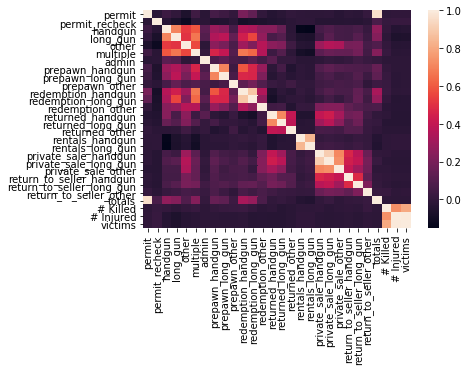

In [0]:
# check for collinearity
import seaborn as sns
corr = checks_vs_ms.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
random_state = 20190501

In [0]:
checks_vs_ms['bin_killed'] = (checks_vs_ms['# Killed'] > 0)
y_bin_k = checks_vs_ms['bin_killed']

checks_vs_ms['bin_injured'] = (checks_vs_ms['# Injured'] > 0)
y_bin_i = checks_vs_ms['bin_injured']

checks_vs_ms['bin_victims'] = (checks_vs_ms['victims'] > 0)
y_bin_victims = checks_vs_ms['bin_victims']

In [0]:
X_train, X_test, y_bin_train_k, y_bin_test_k = train_test_split(X, y_bin_k, test_size=0.75, random_state=random_state)
X_train, X_test, y_bin_train_i, y_bin_test_i = train_test_split(X, y_bin_i, test_size=0.75, random_state=random_state)
X_train, X_test, y_bin_train_v, y_bin_test_v = train_test_split(X, y_bin_victims, test_size=0.75, random_state=random_state)

In [0]:
logreg_k = LogisticRegression()
logreg_i = LogisticRegression()
logreg_v = LogisticRegression()

logreg_k.fit(X_train, y_bin_train_k)
logreg_i.fit(X_train, y_bin_train_i)
logreg_v.fit(X_train, y_bin_train_v)

y_k_lr_pred = logreg_k.predict(X_test)
y_i_lr_pred = logreg_i.predict(X_test)
y_v_lr_pred = logreg_v.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg_k.score(X_train, y_bin_train_k)

0.7725490196078432

In [0]:
logreg_k.score(X_test, y_bin_test_k)

0.7965141612200436

In [0]:
logreg_i.score(X_train, y_bin_train_i)

0.6901960784313725

In [0]:
logreg_i.score(X_test, y_bin_test_i)

0.6989106753812636

In [0]:
logreg_v.score(X_train, y_bin_train_v)

0.6836601307189543

In [0]:
logreg_v.score(X_test, y_bin_test_v)

0.6884531590413944

# OLS on Unnormalized Data
* Instead of dividing # Killed by population, use population as feature and feed it into the model

In [0]:
checks_url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'
checks_df = pd.read_csv(checks_url)

## Clean up shooting and background checks dataframe

In [0]:
for state in ["Mariana Islands", "Puerto Rico", "Virgin Island", "Guam"]:
  checks_df = checks_df[~checks_df.state.str.contains(state)]
checks_df['Year'] = checks_df['month'].str.split('-').str.get(0)
checks_df['Month'] = checks_df['month'].str.split('-').str.get(1)

months = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

checks_df['Month'] = checks_df['Month'].apply(lambda x: months[x])
checks_df.fillna(0.0,inplace=True)
checks_df = checks_df.loc[(checks_df['month'] >= '2014-01') & (checks_df['month'] < '2019-01')]
checks_df = checks_df.drop(columns=['month'])
checks_df = checks_df.rename(columns={'state': 'State'})

In [0]:
census_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/census.csv'
census_df = pd.read_csv(census_url, thousands=',') # the thousands parameter gets rid of the commas in the df
census_df = census_df.rename(index=str, columns={"Geographic Area\n\n": "State"})
census_df = census_df.drop(columns=['2010', '2011', '2012', '2013'])
# census_monthly = pd.DataFrame({'State': census_df.State, '2017': census_df['2017'] // 12, '2018': census_df['2018'] // 12})

In [0]:
shootings_2014_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2014.csv'
shootings_2015_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2015.csv'
shootings_2016_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2016.csv'
shootings_2017_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2017.csv'
shootings_2018_url = 'https://raw.githubusercontent.com/csc59970/GunControl/master/mass_shootings_2018.csv'
shootings_2014 = pd.read_csv(shootings_2014_url)
shootings_2015 = pd.read_csv(shootings_2015_url)
shootings_2016 = pd.read_csv(shootings_2016_url)
shootings_2017 = pd.read_csv(shootings_2017_url)
shootings_2018 = pd.read_csv(shootings_2018_url)

In [0]:
shootings_df = shootings_2014.append([shootings_2015, shootings_2016, shootings_2017, shootings_2018])
shootings_df['Month'] = shootings_df['Incident Date'].str.split().str.get(0)
shootings_df['Year'] = shootings_df['Incident Date'].str.split().str.get(2)
shootings_df = shootings_df.drop(columns=['Address', 'Incident Date', 'City Or County', 'Operations'])
# shootings_df
census_df

In [0]:
checks_vs_shootings = checks_df.merge(shootings_df, 
                            left_on=['State', 'Month', 'Year'], 
                            right_on=['State', 'Month', 'Year'], 
                            how='outer')
checks_vs_shootings.fillna(0.0,inplace=True)

## Preparing columns for merge

In [0]:
States = checks_vs_shootings.columns.unique()
pop_2014 = []
state = []
pop = []
for i in range(census_df.shape[0]):
    state.append( census_df.loc[str(i)]['State'] )
    pop.append( census_df.loc[str(i)]['2014'] )
pop_2014 = {'State':state, 'pop_2014': pop}
pop_2014 = pd.DataFrame(pop_2014)

state = []
pop = []
for i in range(census_df.shape[0]):
    state.append( census_df.loc[str(i)]['State'] )
    pop.append( census_df.loc[str(i)]['2015'] )
pop_2015 = {'State':state, 'pop_2015': pop}
pop_2015 = pd.DataFrame(pop_2015)

state = []
pop = []
for i in range(census_df.shape[0]):
    state.append( census_df.loc[str(i)]['State'] )
    pop.append( census_df.loc[str(i)]['2016'] )
pop_2016 = {'State':state, 'pop_2016': pop}
pop_2016 = pd.DataFrame(pop_2016)

state = []
pop = []
for i in range(census_df.shape[0]):
    state.append( census_df.loc[str(i)]['State'] )
    pop.append( census_df.loc[str(i)]['2017'] )
pop_2017 = {'State':state, 'pop_2017': pop}
pop_2017 = pd.DataFrame(pop_2017)
    
state = []
pop = []
for i in range(census_df.shape[0]):
    state.append( census_df.loc[str(i)]['State'] )
    pop.append( census_df.loc[str(i)]['2018'] )
pop_2018 = {'State':state, 'pop_2018': pop}
pop_2018 = pd.DataFrame(pop_2018)

## Merge

In [0]:
checks_vs_shootings = checks_vs_shootings.merge(pop_2014, 
                            left_on=['State'], 
                            right_on=['State'], 
                            how='outer')
checks_vs_shootings = checks_vs_shootings.merge(pop_2015, 
                            left_on=['State'], 
                            right_on=['State'], 
                            how='outer')
checks_vs_shootings = checks_vs_shootings.merge(pop_2016, 
                            left_on=['State'], 
                            right_on=['State'], 
                            how='outer')
checks_vs_shootings = checks_vs_shootings.merge(pop_2017, 
                            left_on=['State'], 
                            right_on=['State'], 
                            how='outer')
checks_vs_shootings = checks_vs_shootings.merge(pop_2018, 
                            left_on=['State'], 
                            right_on=['State'], 
                            how='outer')

## Feed into model

In [0]:
X = checks_vs_shootings['pop_2014'].values
y = checks_vs_shootings['# Killed'].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(X, y)
plt.ylabel('Number killed')
plt.xlabel('population in 2014')
plt.show

In [0]:
X = checks_vs_shootings['pop_2014'].values
y = checks_vs_shootings['# Killed'].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(X, y)
plt.ylabel('Number killed')
plt.xlabel('population in 2014')
plt.show

prediction_space = np.linspace(min(X), max(y)).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

from sklearn.metrics import r2_score
print("2014:", r2_score(y_test, y_pred))

In [0]:
X = checks_vs_shootings['pop_2015'].values
y = checks_vs_shootings['# Killed'].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(X, y)
plt.ylabel('Number killed')
plt.xlabel('population in 2015')
plt.show

prediction_space = np.linspace(min(X), max(y)).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

from sklearn.metrics import r2_score
print("2015:", r2_score(y_test, y_pred))

In [0]:
X = checks_vs_shootings['pop_2016'].values
y = checks_vs_shootings['# Killed'].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(X, y)
plt.ylabel('Number killed')
plt.xlabel('population in 2016')
plt.show

prediction_space = np.linspace(min(X), max(y)).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

from sklearn.metrics import r2_score
print("2016:", r2_score(y_test, y_pred))

In [0]:
X = checks_vs_shootings['pop_2017'].values
y = checks_vs_shootings['# Killed'].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(X, y)
plt.ylabel('Number killed')
plt.xlabel('population in 2017')
plt.show

prediction_space = np.linspace(min(X), max(y)).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

from sklearn.metrics import r2_score
print("2017:", r2_score(y_test, y_pred))

In [0]:
X = checks_vs_shootings['pop_2018'].values
y = checks_vs_shootings['# Killed'].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(X, y)
plt.ylabel('Number killed')
plt.xlabel('population in 2018')
plt.show

prediction_space = np.linspace(min(X), max(y)).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

from sklearn.metrics import r2_score
# print("2018:", r2_score(y_test, y_pred))

In [0]:
import statsmodels.api as sm

X = checks_vs_shootings[['long_gun', 'pop_2014', 'pop_2015', 'pop_2016', 'pop_2017', 'pop_2018']]
Y = checks_vs_shootings['# Killed']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)